In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
data = pd.read_csv('delivery_time.csv')

In [4]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# **EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [ ]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

# **Correlation Analysis**

In [ ]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


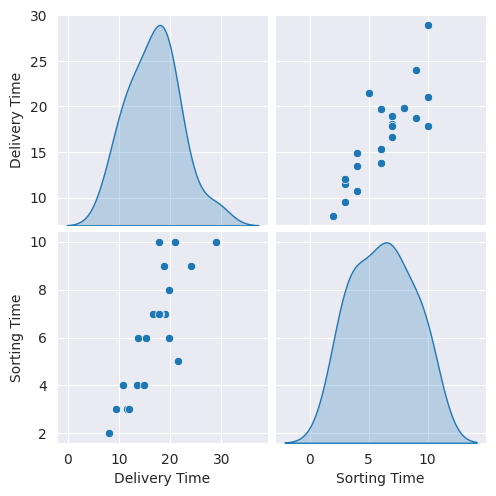

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(data, diag_kind="kde")

# **Visualization**

<ipython-input-55-fd8df65c5d1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

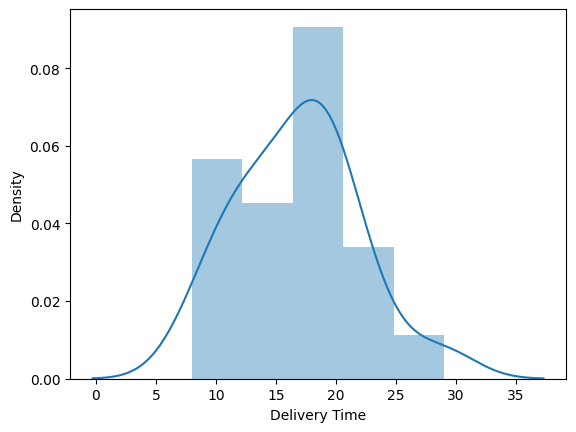

In [ ]:
sns.distplot(data['Delivery Time'])

<ipython-input-57-971e7a7bfcf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

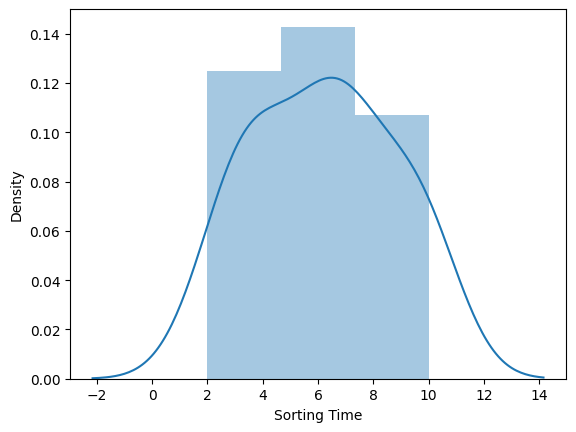

In [ ]:
sns.distplot(data['Sorting Time'])

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

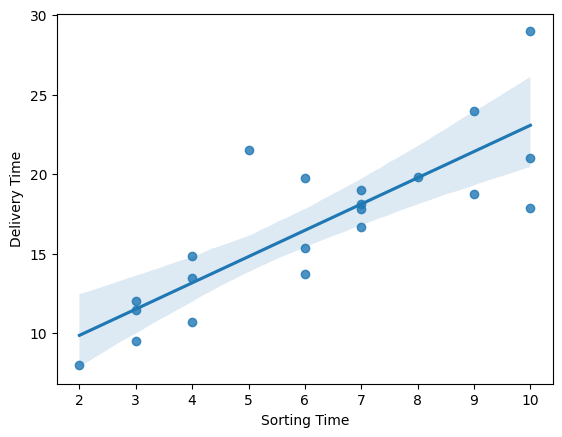

In [ ]:
sns.regplot(x=data['Sorting Time'], y=data['Delivery Time'])

# **Feature Engineering**

In [ ]:
# Renaming Columns
dataset=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# **Model Building**

In [ ]:
model = smf.ols('delivery_time~sorting_time', data = dataset).fit()

# **Model Testing**

In [ ]:
model.params #finding coeffiecient parameters

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
model.tvalues, model.pvalues #finding tvalue and pvalue

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [ ]:
# Finding Rsquared values that is accuracy
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# **Model Predictions**

In [ ]:
# Manual prediction for say sorting time = 5
delivery_time = (6.582734) + (1.649020)*(5) #beta1 = 1.649020, beta0 = 6.582734, x = 5
delivery_time

14.827834

In [ ]:
#Predict for 8 and 5 sorting_time
newdata=pd.Series([8,5])
newdata

0    8
1    5
dtype: int64

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])
data_pred

,sorting_time
0,8
1,5


In [ ]:
model.predict(data_pred)

0    19.774893
1    14.827833
dtype: float64